<h1 style='text-align:center;font-weight:bold;color:orange'>Customer Churn Prediction</h1>

## **1 Introduction**
### **1.1 Context**
Customer churn, a condition when a customer stops purchasing a product or service, is a central issue in every industry, including e-commerce or online retail. Customer churn if not addressed properly will not only affect the brand perception but also reduce the company's revenue. A significant loss of customers for example can create the impression of declining quality of products or services provided by the company. In addition to perception of quality, customers who churn, especially due to their unsatisfaction, are likely to share their negative experience on social media, and hence, it will be more challenging for the brand to affect new customers to purchase their products. Despite unable to see the effect in an short term, brand perception caused by customer churn will eventually influence the company's revenue in the long run.

Financially, customer churn will affect the company in different ways either directly or indirectly. When a customer stop purchasing a product, the company will directly lose revenue. To make it more explicit, let us consider the following hypothetical scenario. When the company has 0% churn rate and average revenue per customer is USD 100 per annum, the annual revenue is USD 1M for 10K customers. Nevertheless, the revenue will decrease into 900K for 10% churn rate (1K customers stopped buying from the company). This decrease in revenue will be getting worse if the churn rate is larger.

Second, the company will also need to increase the customer acquisition budget to, at the very least, balance the direct financial consequence due to the churn but the marketing will not only one who needs extraexpenses. Customer churn will demand different sections in the company to win back the customers and improve the customer experience, including R&D cost to experiment with user interface and customer service efforts to handle customer complaints.

### **1.2 Problem Statement**
Given the importance of this issue, our main business concern is **how the company can address the customer churn issue to decrease the financial impacts** by both exploring the company's historical data and predicting the possibility of customers to churn. Analyzing historical data can provide an understanding of why customers churned in the past and can use the insights for data-driven decision making by the respective teams (e.g, Customer Success, Marketing, Product, Sales, and Finance) but the Customer Success team will be the most directly responsible team in the company for handling the churn as customer experience and churn reduction are their concerns. And for this reason, **the main stakeholder of the current project will be the Customer Success or Customer Experience team**. 

In addition, making a prediction on whether a customer will churn or not equips the Customer Success team to anticipate or develop strategies to improve the customer retention.

### **1.3 Objctives**
The main objectives of our project are twofold. 
- First, we aim to investigate the possible reasons for the churn, and the outcome of this objective is an analysis on Section 3 and a Tableau dashboard for the Customer Experience Manager to explore the causes on their own. While we can associate the churn with different factors in the data, the direct contributing factors of the churn remains an open question due to inavailability of data concerning customer's reason for leaving (e.g., via an open-ended survey). 
- Second, our objective is to build a classification model to predict whether a current customer will stop buying the company's products (churn) or not (not churn). This prediction therefore can be used to flag customers with high probability of churn. This model will enable the stakeholders to proactively mitigate the possibility of churn by identifying at-risk customers. Besides, as the model can identify at-risk customers, the stakeholder can also prioritize outreach according to predicted churn risk so they can be more efficient in allocating resources.

### **1.4 Analytical Approach**
- **Step 1**: Perform a diagnostic analysis to understand the possible reasons for churns in historical data.
- **Step 2**: Build a classifier to predict customer churn (`1` for "Churn" and `0` for "Not churn")

### **1.5 Metrics**
As we have two different objectives, our project will involve different metrics for different purposes. For the data analysis, our main metric will be churn rate, and of course, will be supplemented by supporting metrics (<span style='color:red'>ADE TO LIST HERE</span>). And for the predicting customer churn, let us consider the following two possible misclassifications made by the classification model. The business impacts of each error will guide us to determine which metric(s) is more suitable for the company's business case.
- **Type I Error (False Positive)**: This error happens when the model predicts a customer to churn when they actually don't. This misclassification leads to increasing customer acquisition cost (CAC) as the resources (e.g., discounts or targeted ads) will be allocated to customers who don't leave.
    - In e-commerce, the average CAC is USD 70 ([Userpilot, 2024](https://userpilot.com/blog/average-customer-acquisition-cost/)). Given this cost, the company will need to spend 70K for every 1000-potential customers. Consequently, this error type will cause inefficient marketing budget. 
- **Type II Error (False Negative)** A model predicts a customer to not churn when actually they do. Making a type II error leads to revenue loss as the customer lifetime value (CLV) decreases. 
    - According to [Big Commerce (2024)](https://www.bigcommerce.com/glossary/customer-lifetime-value/), the average CLV is USD 168 for e-commerce. As a consequence, for every 1000 mistakes, the model will cost USD 168K.
- **Type II Error (False Negative)** A model predicts a customer to not churn when actually they do. Making a type II error leads to revenue loss as the company will lose users who contribute to their revenue. 
    - According to [Statista (2024)](hhttps://www.statista.com/statistics/1319571/retail-media-ad-arpu-usa/), the average revenue per user (ARPU) is USD 1,620 for e-commerce (worldwide). As a consequence, for every 1000 mistakes, the model will cost USD 1,62 milion. This significant revenue loss underscores the criticality of the prevention.
    
Despite significantly higher cost of the type II error, we contend that financial impact for Type I is equally important for the business. Hence, we will use F1 to evaluate the classification model's performance in predicting the churn. Here are our considerations for deciding to select F1 score:
- Focusing exclusively on a single metric (e.g., recall to minimize type II errors) can lead to wasted resources when Type I errors are far too high. 
- On the contrary, while choosing precision for an evaluation metric can prevent financial effects of Type II errors, this selection can result in many actual churns (as the precision is sacrificed).
- F1 takes both precision and recall into considerations to reduce the number of both false positives and negatives, thereby preventing both scenarios of financial loss.

### **1.5 Dataset**
The dataset used here belongs to a leading online e-commerce company on customer churn. The dataset which was in an Excel file format was obtained from [Kaggle](https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction/data). This file consists of two sheets, `Data Dict` (information about each column in the dataset) and `E Comm` (the dataset).
- `CustomerID`: Unique customer ID
- `Churn`: Churn status
- `Tenure`: Tenure of customer in organization
- `PreferredLoginDevie`: Preferred login device of customer
- `CityTier`: City tier
- `WarehouseToHome`: Distance between warehouse to home of customer
- `PreferredPaymentMode`: Preferred payment method of customer
- `Gender`: Gender of customer
- `HourSpendOnApp`: Number of hours spent on mobile app or website
- `NumberOfDeviceRegistered`: Total number of devices registered by a customer
- `PreferedOrderCat`: Preferred order category of customer in last month
- `SatisfactionScore`: Satisfaction score of customer on service
- `MaritalStatus`: Marital status of customer
- `NumberOfAddress`: Total number of address of customer
- `Complain`: Complaint raised in last month
- `OrderAmountHikeFromlastYear`: Percentage of increases in order from last year
- `CouponUsed`: Total number of coupon has been used in last month
- `DaySinceLastOrder`: Day since last order by customer
- `CashbackAmount`: Average cashback in last month

Kindly note whether or not all variables will be used for a data analysis and data modeling will be determined based on the findings during the data exploration. Variables with moderate to high correlations, for example, will be excluded for the next stages to avoid problems in the modeling phase.

## **2 Data Preparation**
### **2.1 Initial Inspection**

In [501]:
import pandas as pd                                                         # for data wrangling
import numpy as np                                                          # for numerical operations
from scipy.stats import skew, kurtosis, kstest, shapiro                     # for data distribution
import warnings                                                             # for disabling warnings
warnings.filterwarnings("ignore", category=UserWarning)                     # for disabling warnings
import matplotlib                                                           # for data visulization
warnings.filterwarnings("ignore",             
                        category=matplotlib.MatplotlibDeprecationWarning)   # for disabling matplotlib warnings
import matplotlib.pyplot as plt                                             # for data visualization
import seaborn as sns                                                       # for data visualization 
import missingno as msno                                                    # for checking missing data
# %matplotlib inline
from scipy import stats                                                     # for statistical tests
from sklearn.experimental import enable_iterative_imputer                   # for data imputation
from sklearn.impute import IterativeImputer                                 # for data imputation

In [502]:
# import dataset
data = pd.read_excel('../data/E Commerce Dataset.xlsx', sheet_name=1)

In [503]:
# create function to inspect df
def inspect_dataframe(df):
    print(f'The dataframe contains {df.shape[0]} rows and {df.shape[1]} cols.')
    print(f"- {len(df.select_dtypes(include='number').columns)} are numeric cols")
    print(f"- {len(df.select_dtypes(include='O').columns)} are object cols")
    summary = {
        'ColumnName': df.columns.values.tolist(),
        'Nrow': df.shape[0],
        'DataType': df.dtypes.values.tolist(),
        'NAPct': (df.isna().mean() * 100).round(2).tolist(),
        'DuplicatePct': (df.duplicated().sum()/len(df)*100).round(2),
        'UniqueValue': df.nunique().tolist(),
        'Sample': [df[col].unique() for col in df.columns]
    }
    return pd.DataFrame(summary)

In [504]:
# inspect df
inspect_dataframe(data)

The dataframe contains 5630 rows and 20 cols.
- 15 are numeric cols
- 5 are object cols


,ColumnName,Nrow,DataType,NAPct,DuplicatePct,UniqueValue,Sample
0,CustomerID,5630,int64,0.00,0.0,5630,"[50001, 50002, 50003, 50004, 50005, 50006, 500..."
1,Churn,5630,int64,0.00,0.0,2,"[1, 0]"
2,Tenure,5630,float64,4.69,0.0,36,"[4.0, nan, 0.0, 13.0, 11.0, 9.0, 19.0, 20.0, 1..."
3,PreferredLoginDevice,5630,object,0.00,0.0,3,"[Mobile Phone, Phone, Computer]"
4,CityTier,5630,int64,0.00,0.0,3,"[3, 1, 2]"
5,WarehouseToHome,5630,float64,4.46,0.0,34,"[6.0, 8.0, 30.0, 15.0, 12.0, 22.0, 11.0, 9.0, ..."
6,PreferredPaymentMode,5630,object,0.00,0.0,7,"[Debit Card, UPI, CC, Cash on Delivery, E wall..."
7,Gender,5630,object,0.00,0.0,2,"[Female, Male]"
8,HourSpendOnApp,5630,float64,4.53,0.0,6,"[3.0, 2.0, nan, 1.0, 0.0, 4.0, 5.0]"
9,NumberOfDeviceRegistered,5630,int64,0.00,0.0,6,"[3, 4, 5, 2, 1, 6]"


**Note**
- The dataset contains 5630 rows and 20 columns, consisting 5 object columns and 15 numerical columns. The 5 object cols will later need to be represented in the form of numerical format so they can be modeled together with the rest columns.
- No duplicates were found in the dataset so no treatments are needed.
- Missing values found in 7 columns, namely `Tenure` (4.69%), `WarehouseToHome` (4.46%), `HourSpendOnApp` (4.53%), `OrderAmountHikeFromlastYear` (4.71), `CouponUsed` (4.55), `OrderCount` (4.58), and `DaySinceLastOrder` (5.45%). These columns should be investigated further to understand the mechanisms of the missingness and what treatment is appropriate each condition.

In [505]:
# get statistical summary for numerical var
data.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.50,1625.39,50001.0,51408.25,52815.50,54222.75,55630.00
Churn,5630.0,0.17,0.37,0.0,0.00,0.00,0.00,1.00
Tenure,5366.0,10.19,8.56,0.0,2.00,9.00,16.00,61.00
CityTier,5630.0,1.65,0.92,1.0,1.00,1.00,3.00,3.00
WarehouseToHome,5379.0,15.64,8.53,5.0,9.00,14.00,20.00,127.00
HourSpendOnApp,5375.0,2.93,0.72,0.0,2.00,3.00,3.00,5.00
NumberOfDeviceRegistered,5630.0,3.69,1.02,1.0,3.00,4.00,4.00,6.00
SatisfactionScore,5630.0,3.07,1.38,1.0,2.00,3.00,4.00,5.00
NumberOfAddress,5630.0,4.21,2.58,1.0,2.00,3.00,6.00,22.00
Complain,5630.0,0.28,0.45,0.0,0.00,0.00,1.00,1.00


**Note**
- What is apparent is column `Tenure`, `WarehouseToHome`, `DaySinceLastOrder`, and `CasbackAmount` contain outliers as the max value far greater than the 75% values. However, it is important to remember this is just an initial inspection. The values will change as the duplicates will be removed. And a deeper check with a statistical technique will be done to check whether or not the aforementioned columns contain outliers.
- Lorem ipsum

<div class="alert alert-block alert-warning">
<b>Next steps for data preprocessing</b><br>

- Handle missing values

- Convert object cols to numeric

- Rescale numbers

- Check imbalance distribution of the target variable
</div>

In [506]:
# check churn rate
data['Churn'].value_counts(normalize=True).reset_index(name='rate')

,index,rate
0,0,0.831616
1,1,0.168384


### **2.2 Check Missing Values**

This subsection explores which mechanism of missingness best characterizes the missingness in our dataset so we can decide which treatment is suitable.

Theoretically speaking, mechanisms or patterns of missing data can be classified into X labels, namely A, B, and C ([Newman, 2014](https://journals.sagepub.com/doi/abs/10.1177/1094428114548590)). 
- MAR
- MCAR
- MNAR

Several options to test patterns of missingness in dataset can be used such as a simple examination on missing value counts, chi-square test, a correlation test, ....

In [507]:
# check missing values
missing_values = data.isna().sum()
missing_values_percentage = data.isna().mean() * 100

missing_values_df = pd.DataFrame({
    'Count': missing_values,
    'Percentage': missing_values_percentage.round(3)
})

# display in descending order
missing_values_df.sort_values(by='Count', ascending=False)

,Count,Percentage
DaySinceLastOrder,307,5.453
OrderAmountHikeFromlastYear,265,4.707
Tenure,264,4.689
OrderCount,258,4.583
CouponUsed,256,4.547
HourSpendOnApp,255,4.529
WarehouseToHome,251,4.458
CustomerID,0,0.000
MaritalStatus,0,0.000
Complain,0,0.000


As previously noted, columns `Tenure`, `WarehouseToHome`, `HourSpendOnApp`, `OrderAmountHikeFromlastYear`, `CouponUsed`, `OrderCount`, `DaySinceLastOrder`), column `DaySinceLastOrder` contain missing values. The missing value rates are around 4.0 (rounded down). Mechanisms of missingness will be performed to understand the patterns. However, before moving forward, data distribution check should be firstly done as investigating the mechanisms of missing data will require a statistical test. The outcome of the distribution check is therefore to inform what statistical test should be chosen based on the characteristic of the data.

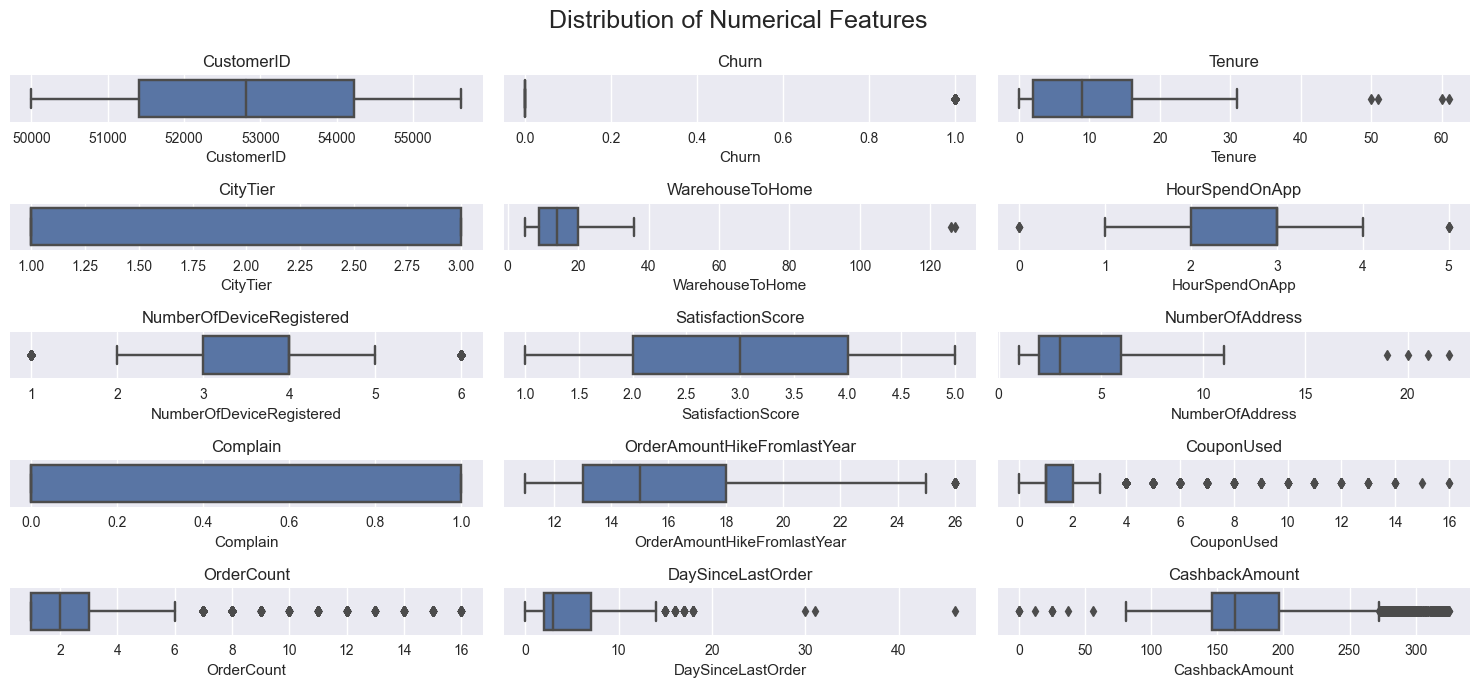

In [509]:
# define num cols
numerical_columns = data.select_dtypes(include='number')

# setup up figure size
plt.figure(figsize=(15, 7))
plt.suptitle('Distribution of Numerical Features', fontsize=18)

# check outliers using boxplots
for i, col in enumerate(numerical_columns):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=data[col])
    plt.title(f'{col}')

plt.tight_layout()
plt.show()

**Note**: As the data in the majority of columns are not normally distributed, nonparameteric techniques can be used for a further analysis on correlations.

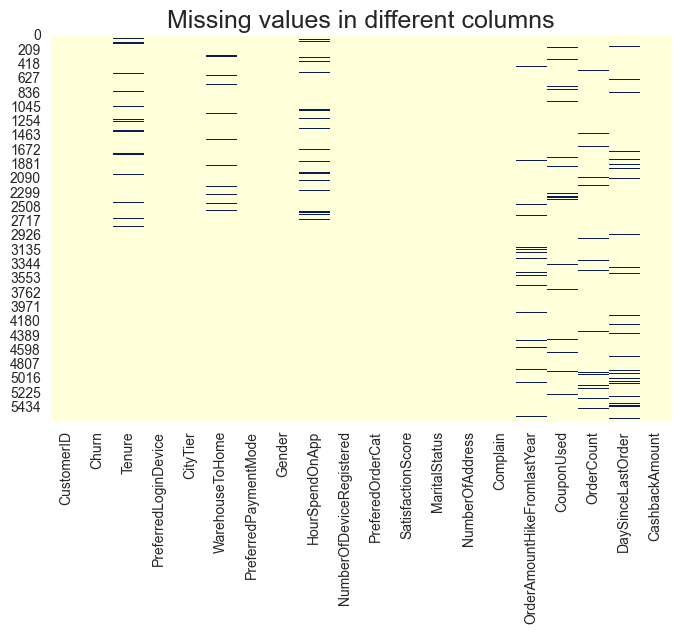

In [510]:
# check columns with missing values
plt.figure(figsize=(8,5))
sns.heatmap(data.isna(), cmap='YlGnBu', cbar=False)
plt.title('Missing values in different columns', fontsize=18)
plt.show()

**Note**
- At glance, it seems that the missing values in column `Tenure`, `WarehouseToHome`, and `HourSpendOnApp` only appear in the beginning of the dataset but the missingness between columns doesn't look to correspond to each other. For example, if row ID 977 (see dataframe below) in column `WarehouseToHome` is missing, values in other columns are not.
- The other four variables, moreover, look random as each missing values appear in different rows.

In [340]:
# display three vars of interests
data.loc[:, ['Tenure', 'WarehouseToHome', 'HourSpendOnApp']].sample(n=10, random_state=42)

,Tenure,WarehouseToHome,HourSpendOnApp
4331,1.0,7.0,4.0
1988,15.0,9.0,3.0
3443,13.0,29.0,3.0
4559,5.0,7.0,4.0
4898,13.0,7.0,4.0
4641,8.0,7.0,3.0
2117,29.0,15.0,NaN
3268,12.0,9.0,4.0
977,9.0,NaN,3.0
1115,12.0,6.0,3.0


In [341]:
# subset cols with missing values
subset_data = data[data.columns[data.isna().any()]]

# display data
display(subset_data.sample(10, random_state=42))

,Tenure,WarehouseToHome,HourSpendOnApp,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder
4331,1.0,7.0,4.0,22.0,2.0,2.0,1.0
1988,15.0,9.0,3.0,13.0,1.0,1.0,3.0
3443,13.0,29.0,3.0,14.0,2.0,NaN,9.0
4559,5.0,7.0,4.0,13.0,4.0,4.0,3.0
4898,13.0,7.0,4.0,17.0,10.0,NaN,9.0
4641,8.0,7.0,3.0,14.0,2.0,2.0,4.0
2117,29.0,15.0,NaN,19.0,1.0,1.0,3.0
3268,12.0,9.0,4.0,13.0,5.0,5.0,13.0
977,9.0,NaN,3.0,21.0,0.0,1.0,2.0
1115,12.0,6.0,3.0,15.0,3.0,5.0,8.0


**Note**: 
- There seem to be no apparent or explicit patterns in the missing values between variables. What is meant by explicit is when a value in one variable is empty (`NaN`), that in another variable will be empty too or have monotonous values. Or else, the patterns of missingness are not in the surface level so a deeper check should be done.
- Mechanisms of missing values can be further explored by exploiting Spearman correlation test. This non-parametric test is more considered as the majority of variables indicate non-normal data distribution. Moreover, Spearman correlation test can evaluate the relationship between missing values and other variables.

In [342]:
# check correlation
(subset_data.corr(method='spearman')
 .style.background_gradient(cmap='YlOrRd')
 .format('{:.3f}'))

,Tenure,WarehouseToHome,HourSpendOnApp,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder
Tenure,1.000,-0.046,-0.004,0.014,0.124,0.174,0.205
WarehouseToHome,-0.046,1.000,0.081,0.042,0.017,0.023,0.025
HourSpendOnApp,-0.004,0.081,1.000,0.135,0.323,0.304,0.107
OrderAmountHikeFromlastYear,0.014,0.042,0.135,1.000,0.071,0.058,0.001
CouponUsed,0.124,0.017,0.323,0.071,1.000,0.727,0.319
OrderCount,0.174,0.023,0.304,0.058,0.727,1.000,0.469
DaySinceLastOrder,0.205,0.025,0.107,0.001,0.319,0.469,1.000


**Note**
- The dataframe above displays how missing values in one column is correlated with missing values in another.
- Column `OrderCount` is highly correlated with `CouponUsed` ($\rho$ = 0.727), and has a moderate correlation ($\rho$ = 0.469). One of these variables will be excluded during the modeling phase to prevent multicollinearity
- This output is expected as the higher number of orders, values in other variables (e.g., `CouponUsed`, `DaySinceLastOrder`) ideally should be higher as well because customers who make more purchases usually get and use more coupons.

A chi-square test will be used to assess whether the probability of values being missing is associated with the value itself (MNAR) or independent of the value (either MAR or MCAR). To make it more explicit, probability of missing values independent of the values themselves is the null hypothesis ($H_0$).

<span style='color:red'>WHY MAR NOT MCAR?</span>

In [416]:
# use chi square test for understanding mechanism of missingness
data['OrderCount_missing'] = data['OrderCount'].isna().astype(int)
categorical_columns = data.select_dtypes(include=['object']).columns

chi2_tests_results = {}
for col in categorical_columns:
    chi2, p, _, _ = stats.chi2_contingency(pd.crosstab(data[col], data['OrderCount_missing']))
    chi2_tests_results[col] = (chi2, p)

chi2_results_df = (pd.DataFrame
                   .from_dict(chi2_tests_results, orient='index', columns=['Chi-Square', 'p-value'])
                   .sort_values(by='Chi-Square', ascending=False))
chi2_results_df.reset_index(inplace=True)
chi2_results_df.rename(columns={'index': 'Category'}, inplace=True)

# display resuults
display(chi2_results_df)

,Category,Chi-Square,p-value
0,PreferedOrderCat,1071.940947,1.593202e-229
1,PreferredPaymentMode,106.521847,1.089348e-20
2,PreferredLoginDevice,78.278645,1.004635e-17
3,Gender,12.881280,3.318852e-04
4,MaritalStatus,8.690191,1.297027e-02


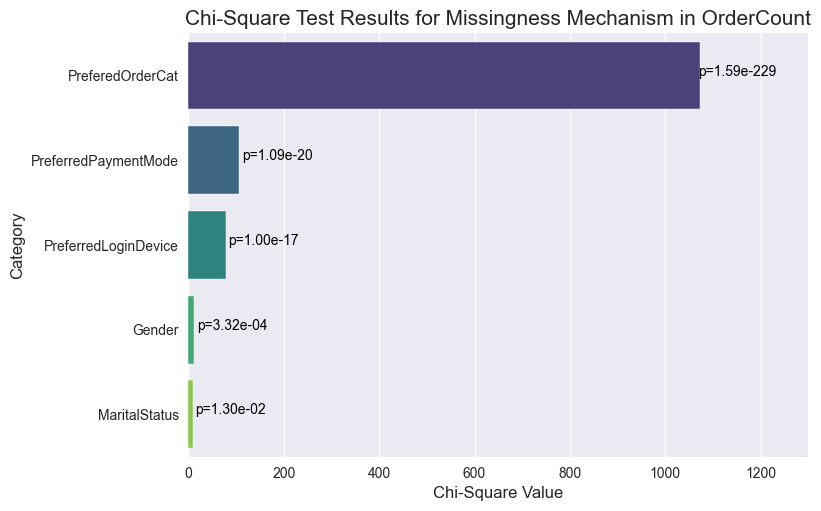

In [519]:
sns.barplot(x='Chi-Square', y='Category', data=chi2_results_df, palette='viridis')

# Annotate p-values
for index, row in chi2_results_df.iterrows():
    plt.text(row['Chi-Square'] + 80, 
             index, 
             f'p={row["p-value"]:.2e}', 
             color='black', 
             ha="center", 
             fontsize=10)

plt.title('Chi-Square Test Results for Missingness Mechanism in OrderCount', fontsize=15)
plt.xlabel('Chi-Square Value', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.xlim(0, 1300)
plt.show()

**Note**: 
- Based on the chi-squared ($\chi^2$) test, all variables above are significantly associated with `OrderCount`, meaning that the values in `OrderCount` depend on those in `PreferredLoginDevice`, `PreferredpaymentMode`, `Gender`, `PreferredOrderCat`, and `MaritalStatus` (rejecting the null hypothesis (MNAR) with $\alpha$ at 0.05). This result suggests that the mechanism of missingness is likely MAR as the missingness is related to the observed values.
- To addresss the missingness with such characteristic, Multiple Imputation with Chained Equation (MICE) can be an option.

<span style='color:red'>JUSTIFY WHY USING MICE</span>

In [344]:
# copy dataset
df = data.copy()

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_cols]

# Apply MICE imputation to the numeric columns
imputer = IterativeImputer(max_iter=10, random_state=42)
df_imputed_numeric = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

# Integrate the imputed values back into the original df
df[numeric_cols] = df_imputed_numeric

**Note**: <span style='color:red'>Explain how MICE algorithm works</span>

In [345]:
# check missing values
df.isna().sum().reset_index(name='count')

,index,count
0,CustomerID,0
1,Churn,0
2,Tenure,0
3,PreferredLoginDevice,0
4,CityTier,0
5,WarehouseToHome,0
6,PreferredPaymentMode,0
7,Gender,0
8,HourSpendOnApp,0
9,NumberOfDeviceRegistered,0


In [346]:
# evaluate quality of imputation technique
cols = data.columns[data.isna().any()]
original_summary = data[cols].describe()
imputed_summary = df[cols].describe()

print(f'Cols containing missing values: \n{cols}\n')
print("Original Data Summary:")
display(original_summary.round(3))

print("\nImputed Data Summary:")
display(imputed_summary.round(3))

Cols containing missing values: 
Index(['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder'],
      dtype='object')

Original Data Summary:


,Tenure,WarehouseToHome,HourSpendOnApp,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder
count,5366.000,5379.000,5375.000,5365.000,5374.000,5372.000,5323.000
mean,10.190,15.640,2.932,15.708,1.751,3.008,4.543
std,8.557,8.531,0.722,3.675,1.895,2.940,3.654
min,0.000,5.000,0.000,11.000,0.000,1.000,0.000
25%,2.000,9.000,2.000,13.000,1.000,1.000,2.000
50%,9.000,14.000,3.000,15.000,1.000,2.000,3.000
75%,16.000,20.000,3.000,18.000,2.000,3.000,7.000
max,61.000,127.000,5.000,26.000,16.000,16.000,46.000



Imputed Data Summary:


,Tenure,WarehouseToHome,HourSpendOnApp,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder
count,5630.000,5630.000,5630.000,5630.000,5630.000,5630.000,5630.000
mean,9.933,15.634,2.912,15.714,1.786,3.077,4.623
std,8.470,8.341,0.712,3.589,1.914,2.954,3.608
min,-2.929,5.000,0.000,11.000,0.000,0.872,0.000
25%,2.000,9.000,2.000,13.000,1.000,1.000,2.000
50%,8.000,14.000,3.000,15.000,1.000,2.000,3.624
75%,15.000,20.000,3.000,18.000,2.000,3.000,7.000
max,61.000,127.000,5.000,26.000,16.000,17.265,46.000


In [347]:
# export dataframe for external uses
df.to_csv('../data/clean_data.csv')

<div class="alert alert-block alert-warning">
<b>Recapitulation</b><br>

- Lorem ipsum
</div>

## **3 Exploratory Data Analysis**

As discussed earlier in the Section 1, the ultimate goal is to address customer churn, and to this end, we firstly need to identify the characteristics of customers who churned. This identification will shed light on the possible contributing factors of the churn, and enable the Customer Success Manager as the key stakeholder of this project to take necessary action to mitigate the business impacts of the customer churn. This section explores the dataset by relating every features (both categorical and numerical) to the target variable, i.e., `Churn`. By associating the features to `Churn`, it is expected to gain an understanding of the customers' characteristics who no longer make any purchases in the e-commerce platform.

To make this section more structured, we mainly divide section 3 into two groups based on the broad data types: categorical and numerical features. The division will be further detailed by using questions to guide the analysis. However, before moving on to the first subsection, we will check out the overall churn rate in the e-commerce company as this will be the starting point for our analysis and data modeling.
- **Categorical features**
    - Q1: Which login device do churners generally prefer?
    - Q2: Are there any preferred payment mode the churners have?
    - Q3: What gender category are the churners?
    - Q4: Are those churners mostly single?
    - Q5: Do churners have any preference interms of order category?
- **Numerical features**
    - Q1: <span style='color: red'>Lorem ipsum</span>
    - Q2: <span style='color: red'>Lorem ipsum</span>
    - Q3: <span style='color: red'>Lorem ipsum</span>

In [378]:
# get churn rate
target_col = pd.DataFrame({'count':df['Churn'].value_counts(),
                           'proportion':round(df['Churn'].value_counts(normalize=True) *100, 2)})
display(target_col)

,count,proportion
0.0,4682,83.16
1.0,948,16.84


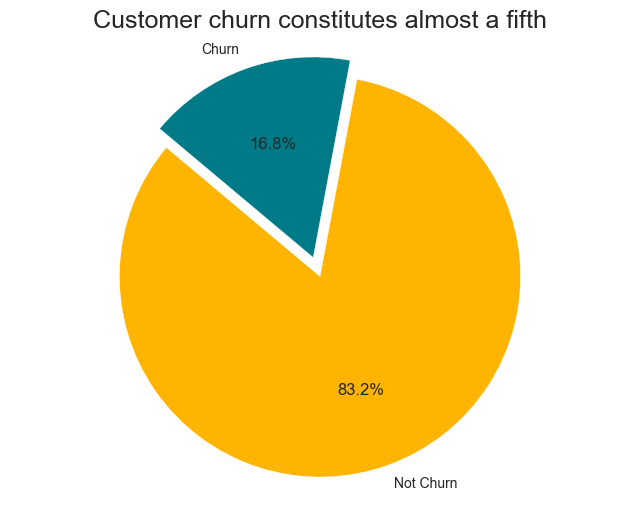

In [389]:
# display pie chart
labels = ['Not Churn', 'Churn']
sizes = target_col['count']
color = ["#FFB400", "#007A87"]
explode = (0, 0.1) 

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=color, autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')  
plt.title('Customer churn constitutes almost a fifth', loc='center', fontsize=18)
plt.show()

**Note**
- As can be seen, the distribution of categories in the target variable is imbalanced. The number of customers who not churned (still making purchases) is almost 5 times of churning customers.
- For a comparison, the average customer churn rate in online retails or e-commerce in the US is 22% ([Statista, 2022](https://www.statista.com/statistics/816735/customer-churn-rate-by-industry-us/)). Despite lower than that in the US, this number is alarming as it is closer to the average. To mitigate the negative impacts of the customer churn, the company should take an action to lower the churn rate.

### **3.1 Categorical Features**

In [392]:
# get counts of each cat feature by churn status
aggregation_dict = {'PreferredLoginDevice': 'count',
                   'PreferredPaymentMode': 'count',
                   'Gender': 'count',  
                   'PreferedOrderCat': 'count',
                   'MaritalStatus': 'count'}  

df.groupby('Churn').agg(func=aggregation_dict).reset_index()

,Churn,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,0.0,4682,4682,4682,4682,4682
1,1.0,948,948,948,948,948


**Note**: In general, irrespective of features, churners (customers who churn) are smaller in counts, compared to those who stays. This finding stresses the higher frequency of churning customers that have been discussed earlier. And after this, we will check each categorical feature in greater details using data visualization technique.

#### **Q1. Which login device do churners generally prefer?**

In [454]:
churn_device_df = (df.groupby(['Churn', 'PreferredLoginDevice'])
                   .agg(func={'PreferredLoginDevice':'count'})
                   .rename(columns={'PreferredLoginDevice':'Count'})
                   .reset_index()
                   .sort_values(by='Count', ascending=False))

churn_device_df

,Churn,PreferredLoginDevice,Count
1,0.0,Mobile Phone,2417
0,0.0,Computer,1310
2,0.0,Phone,955
4,1.0,Mobile Phone,348
3,1.0,Computer,324
5,1.0,Phone,276


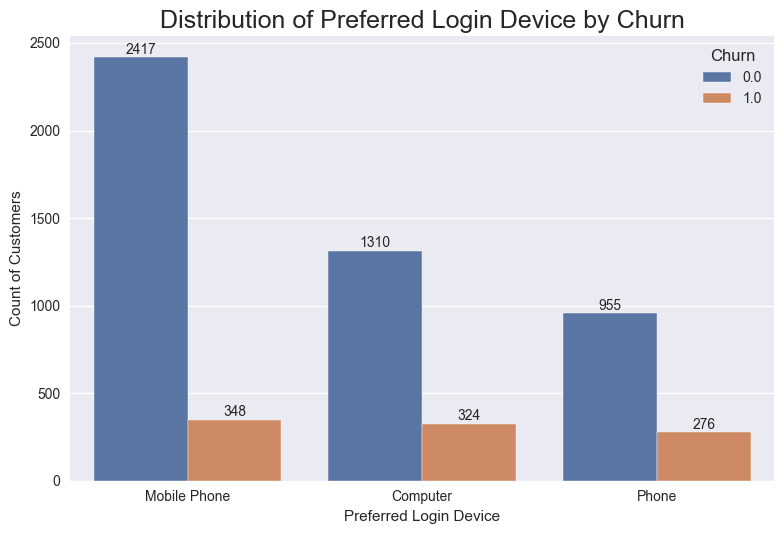

In [522]:
plot1 = sns.barplot(x='PreferredLoginDevice', y='Count', hue='Churn', data=churn_device_df)

# add labels
for bar in plot1.patches:
  height = bar.get_height()
  label_text = int(height)                      # extract count value from bar height
  x_pos = bar.get_x() + bar.get_width() / 2     # center label horizontally
  y_pos = height + 5                            # adjust vertical position slightly above bar
  plot1.text(x_pos, y_pos, label_text, ha='center', va='bottom', fontsize=10)

plt.xlabel('Preferred Login Device')
plt.ylabel('Count of Customers')
plt.title('Distribution of Preferred Login Device by Churn', fontsize=18)
plt.xticks(rotation=0, ha='center')  
plt.tight_layout()
plt.show()

**Note**: Lorem ipsum insights here

#### **Q2. Are there any preferred payment mode the churners have?**

In [469]:
payment_df = (df.groupby(['Churn', 'PreferredPaymentMode'])
              .agg(func={'PreferredPaymentMode':'count'})
              .rename(columns={'PreferredPaymentMode':'Count'})
              .reset_index()
              .sort_values(by='Count', ascending=False))

payment_df

,Churn,PreferredPaymentMode,Count
4,0.0,Debit Card,1958
3,0.0,Credit Card,1308
5,0.0,E wallet,474
11,1.0,Debit Card,356
6,0.0,UPI,342
1,0.0,COD,260
0,0.0,CC,214
10,1.0,Credit Card,193
12,1.0,E wallet,140
2,0.0,Cash on Delivery,126


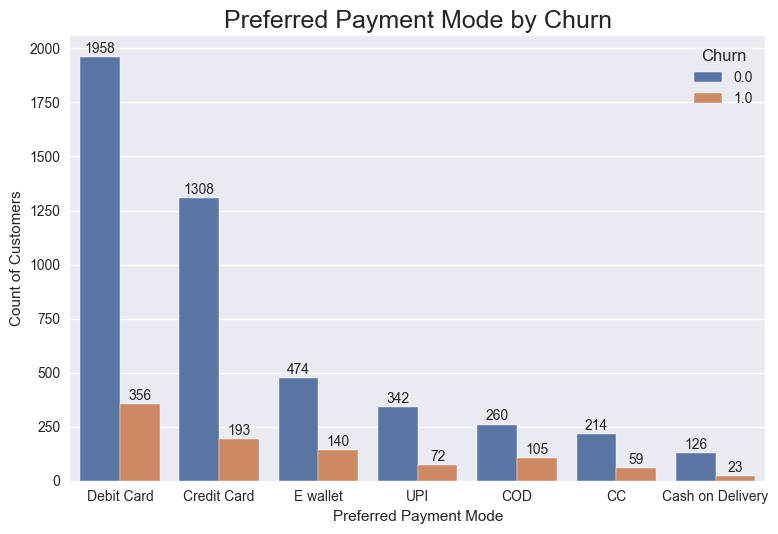

In [472]:
plot2 = sns.barplot(x='PreferredPaymentMode', y='Count', hue='Churn', data=payment_df)

# add labels
for bar in plot2.patches:
  height = bar.get_height()
  label_text = int(height)                      # extract count value from bar height
  x_pos = bar.get_x() + bar.get_width() / 2     # center label horizontally
  y_pos = height + 5                            # adjust vertical position slightly above bar
  plot2.text(x_pos, y_pos, label_text, ha='center', va='bottom', fontsize=10)

plt.xlabel('Preferred Payment Mode')
plt.ylabel('Count of Customers')
plt.title('Preferred Payment Mode by Churn', fontsize=18)
plt.xticks(rotation=0, ha='center')  
plt.tight_layout()
plt.show()

**Note**: Lorem ipsum insights here

#### **Q3. What gender category are the churners?**

In [478]:
gender_df = (df.groupby(['Churn', 'Gender'])
             .agg(func={'Gender':'count'})
             .rename(columns={'Gender':'Count'})
             .reset_index()
             .sort_values(by='Count', ascending=False))
gender_df

,Churn,Gender,Count
1,0.0,Male,2784
0,0.0,Female,1898
3,1.0,Male,600
2,1.0,Female,348


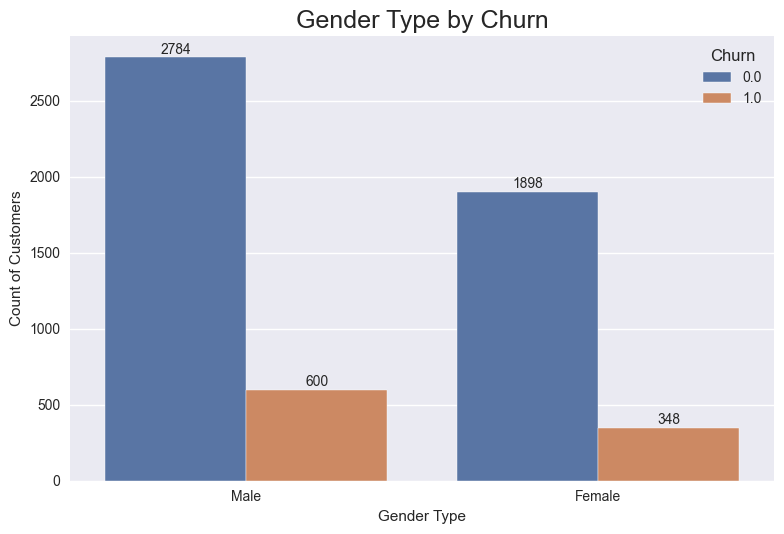

In [480]:
plot3 = sns.barplot(x='Gender', y='Count', hue='Churn', data=gender_df)

# add labels
for bar in plot3.patches:
  height = bar.get_height()
  label_text = int(height)                      # extract count value from bar height
  x_pos = bar.get_x() + bar.get_width() / 2     # center label horizontally
  y_pos = height + 5                            # adjust vertical position slightly above bar
  plot3.text(x_pos, y_pos, label_text, ha='center', va='bottom', fontsize=10)

plt.xlabel('Gender Type')
plt.ylabel('Count of Customers')
plt.title('Gender Type by Churn', fontsize=18)
plt.xticks(rotation=0, ha='center')  
plt.tight_layout()
plt.show()

**Note**: Lorem ipsum insights here

#### **Q4. Are those churners mostly single?**

In [483]:
marital_df = (df.groupby(['Churn', 'MaritalStatus'])
             .agg(func={'MaritalStatus':'count'})
             .rename(columns={'MaritalStatus':'Count'})
             .reset_index()
             .sort_values(by='Count', ascending=False))
marital_df

,Churn,MaritalStatus,Count
1,0.0,Married,2642
2,0.0,Single,1316
0,0.0,Divorced,724
5,1.0,Single,480
4,1.0,Married,344
3,1.0,Divorced,124


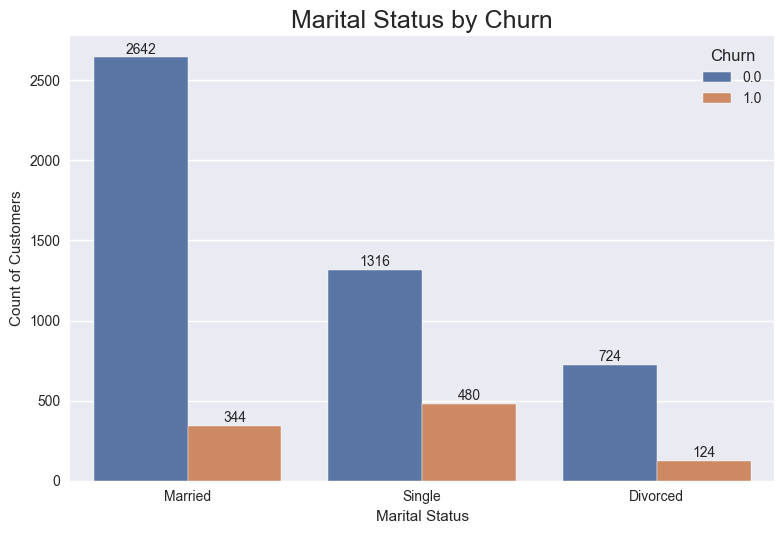

In [485]:
plot4 = sns.barplot(x='MaritalStatus', y='Count', hue='Churn', data=marital_df)

# add labels
for bar in plot4.patches:
  height = bar.get_height()
  label_text = int(height)                      # extract count value from bar height
  x_pos = bar.get_x() + bar.get_width() / 2     # center label horizontally
  y_pos = height + 5                            # adjust vertical position slightly above bar
  plot4.text(x_pos, y_pos, label_text, ha='center', va='bottom', fontsize=10)

plt.xlabel('Marital Status')
plt.ylabel('Count of Customers')
plt.title('Marital Status by Churn', fontsize=18)
plt.xticks(rotation=0, ha='center')  
plt.tight_layout()
plt.show()

**Note**: Lorem ipsum add interpretation here.

#### **Q5. Do churners have any preference in terms of order category?**

In [487]:
order_df = (df.groupby(['Churn', 'PreferedOrderCat'])
             .agg(func={'PreferedOrderCat':'count'})
             .rename(columns={'PreferedOrderCat':'Count'})
             .reset_index()
             .sort_values(by='Count', ascending=False))
order_df

,Churn,PreferedOrderCat,Count
2,0.0,Laptop & Accessory,1840
4,0.0,Mobile Phone,921
0,0.0,Fashion,698
3,0.0,Mobile,589
1,0.0,Grocery,390
10,1.0,Mobile Phone,350
5,0.0,Others,244
9,1.0,Mobile,220
8,1.0,Laptop & Accessory,210
6,1.0,Fashion,128


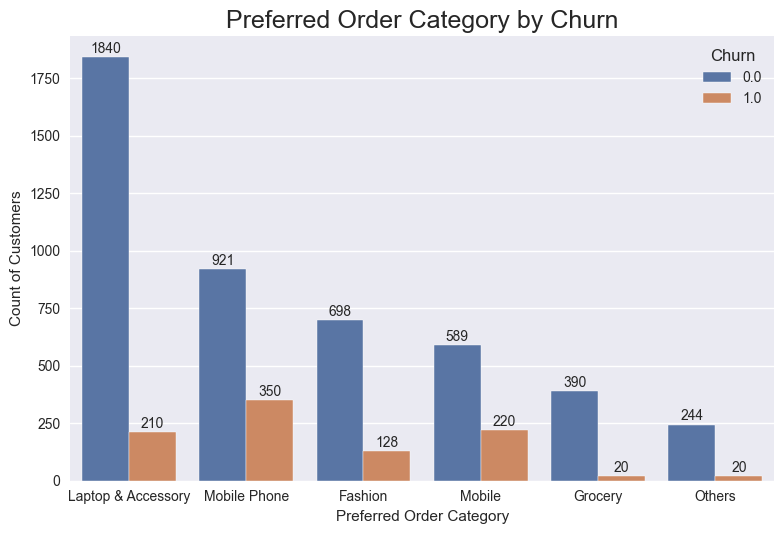

In [489]:
plot5 = sns.barplot(x='PreferedOrderCat', y='Count', hue='Churn', data=order_df)

# add labels
for bar in plot5.patches:
  height = bar.get_height()
  label_text = int(height)                      # extract count value from bar height
  x_pos = bar.get_x() + bar.get_width() / 2     # center label horizontally
  y_pos = height + 5                            # adjust vertical position slightly above bar
  plot5.text(x_pos, y_pos, label_text, ha='center', va='bottom', fontsize=10)

plt.xlabel('Preferred Order Category')
plt.ylabel('Count of Customers')
plt.title('Preferred Order Category by Churn', fontsize=18)
plt.xticks(rotation=0, ha='center')  
plt.tight_layout()
plt.show()

**Note**: Lorem ipsum add interpretation here.

### **3.2 Numerical Features**

Note: Untuk EDA perlu handle outliers juga nggak?

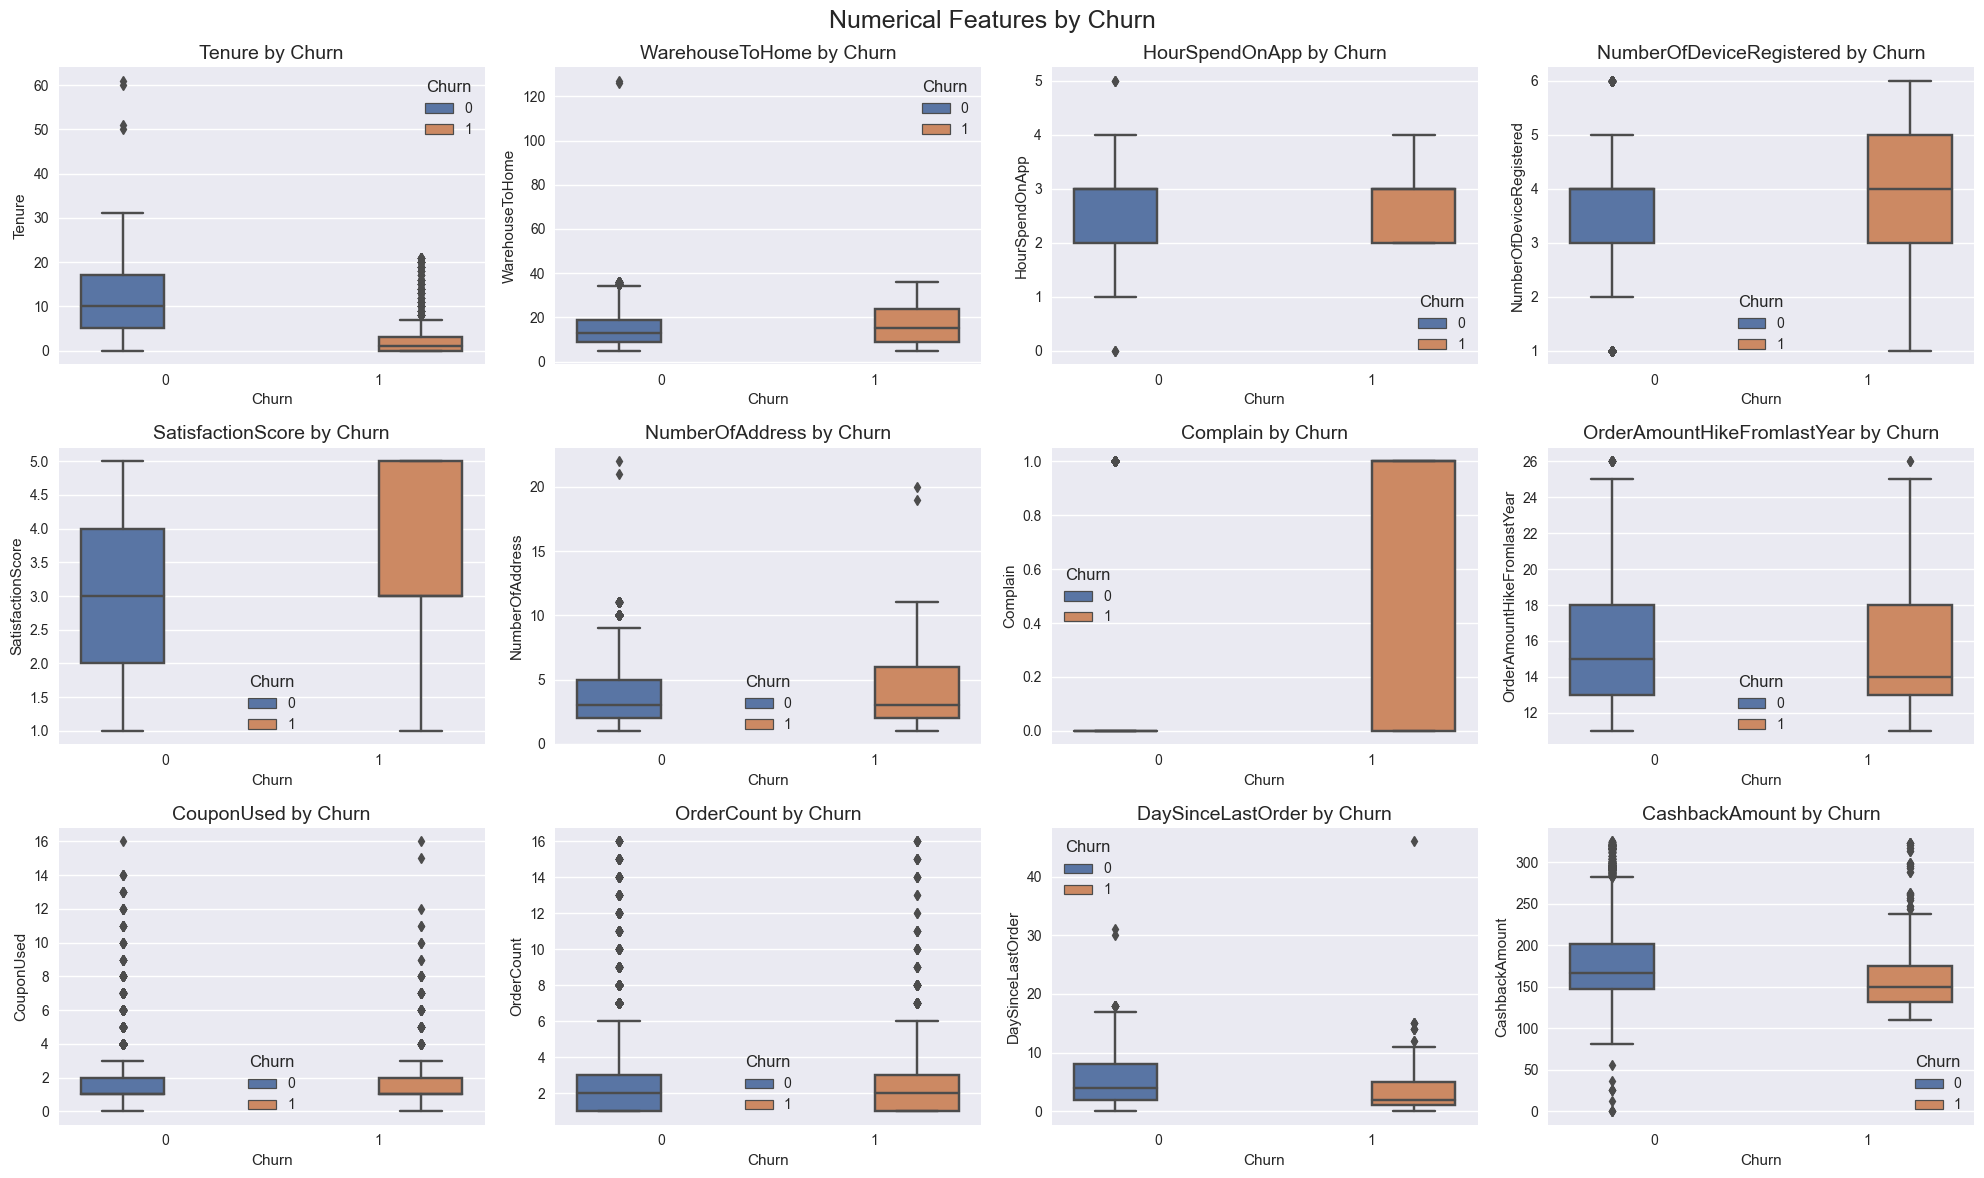

In [511]:
columns_to_plot = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 
                   'NumberOfDeviceRegistered', 'SatisfactionScore', 
                   'NumberOfAddress', 'Complain', 
                   'OrderAmountHikeFromlastYear', 
                   'CouponUsed', 'OrderCount', 
                   'DaySinceLastOrder',
                   'CashbackAmount']

plt.figure(figsize=(20, 12))
plt.suptitle('Numerical Features by Churn', fontsize=18)

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 4, i) 
    sns.boxplot(x='Churn', y=column, data=data, hue='Churn') 
    plt.title(f'{column} by Churn', fontsize=14)
    plt.xlabel('Churn')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


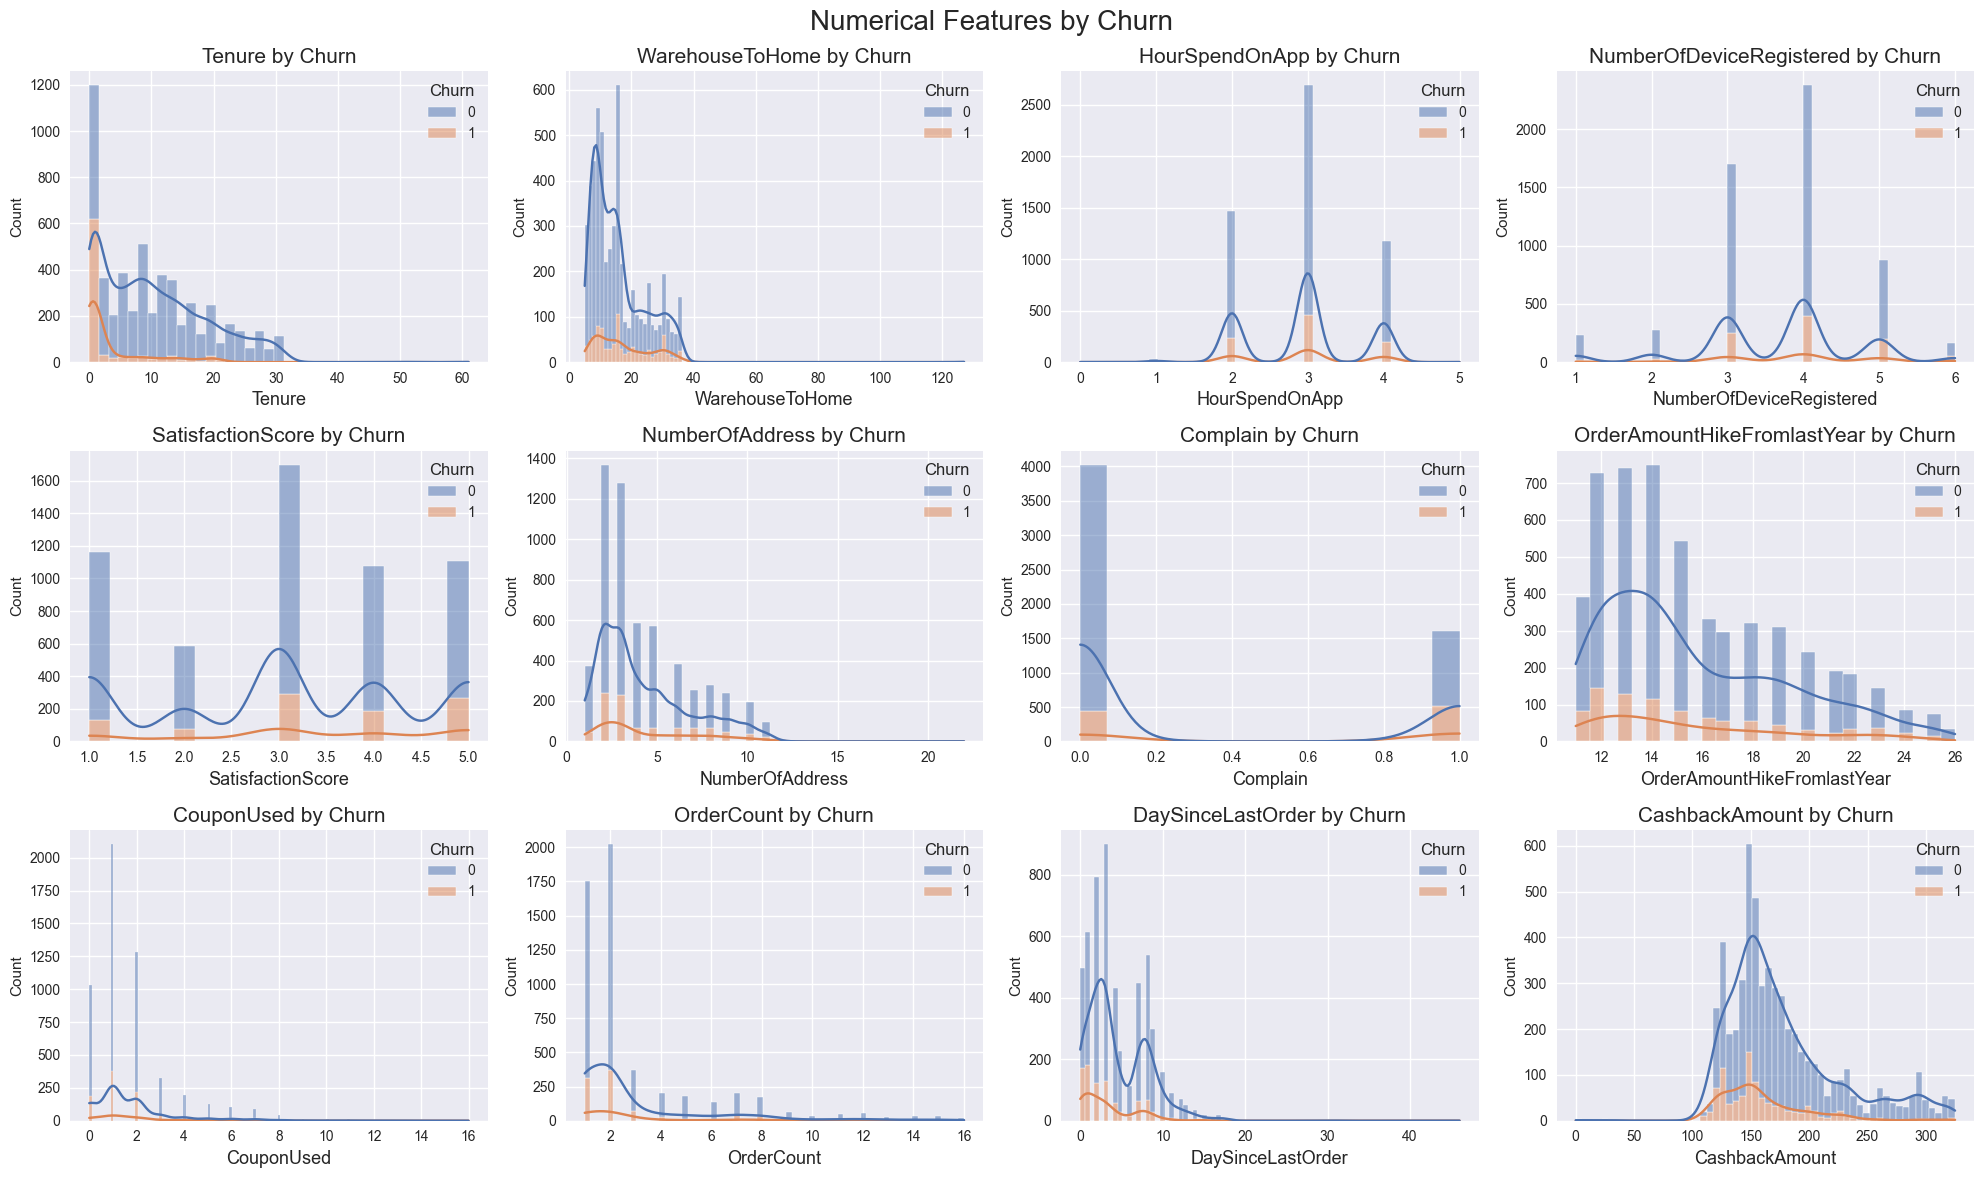

In [521]:
plt.figure(figsize=(20, 12))
plt.suptitle('Numerical Features by Churn', fontsize=20)

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 4, i) 
    sns.histplot(data=data, x=column, hue='Churn', multiple='stack', kde=True)
    plt.title(f'{column} by Churn', fontsize=15)
    plt.xlabel(column, fontsize=13)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

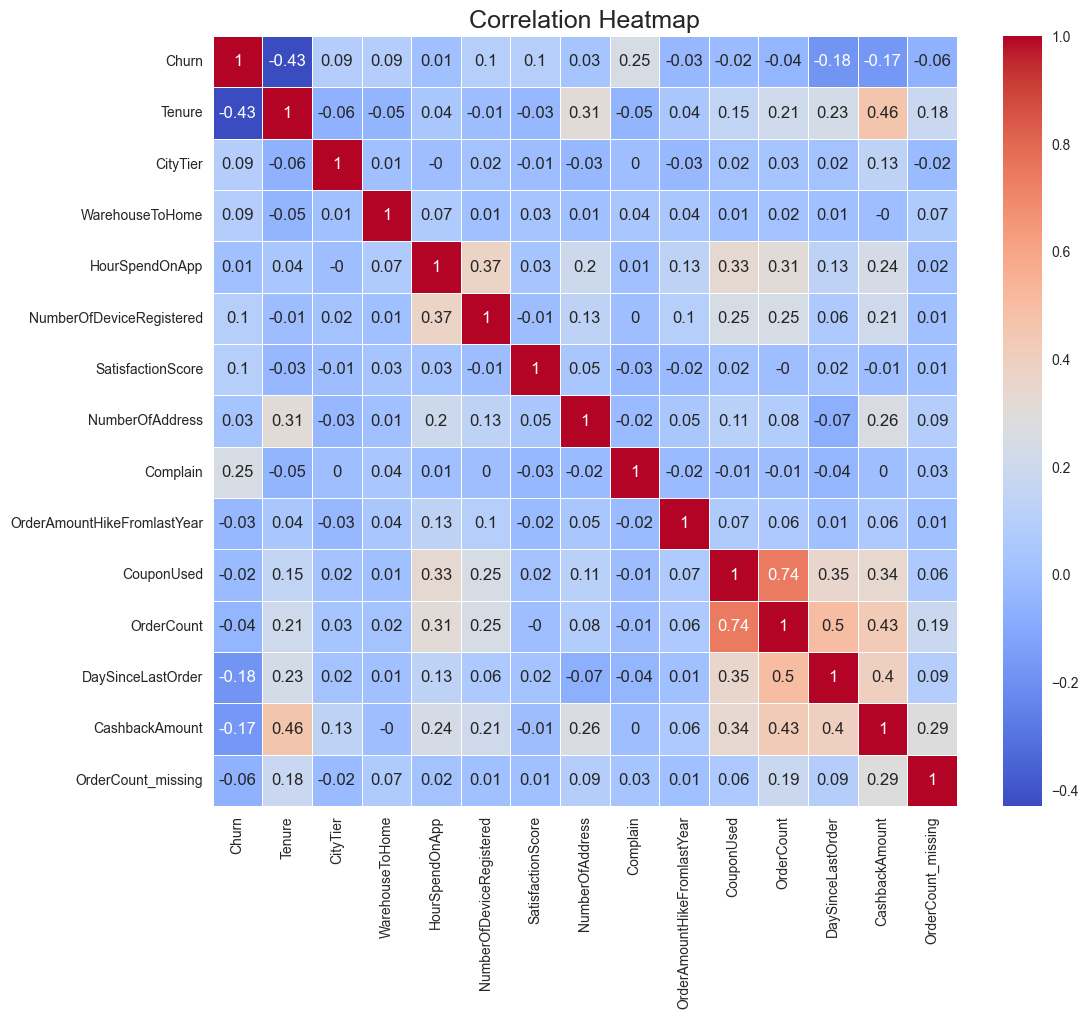

In [515]:
plt.figure(figsize=(12, 10))
cols_to_plot = ['Churn', 'Tenure', 'CityTier',
                'WarehouseToHome','HourSpendOnApp', 
                'NumberOfDeviceRegistered', 'SatisfactionScore',
                'NumberOfAddress', 'Complain', 
                'OrderAmountHikeFromlastYear',
                'CouponUsed', 'OrderCount',
                'DaySinceLastOrder', 'CashbackAmount',
                'OrderCount_missing']

correlation_matrix = df[cols_to_plot].corr(numeric_only=True, method='spearman').round(2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=18)
plt.show()

**Note**: Lorem ipsum

**Note to ade**: perform statistical tests iteratively on numerical features

## **References**

- Newman, D. A. (2014). Missing Data: Five Practical Guidelines. Organizational Research Methods, 17(4), 372-411. https://doi.org/10.1177/1094428114548590
- Sweidan, D., Johansson, U., Gidenstam, A., & Alenljung, B. (2022, December). Predicting customer churn in retailing. In 2022 21st IEEE International Conference on Machine Learning and Applications (ICMLA) (pp. 635-640). IEEE.

___

## **Dikeep Dulu**
## **1 Introduction**
### **1.1 Context**

**Stating from the original source:**

✅ The data set belongs to a leading online E-Commerce company. An online retail (E commerce) company wants to know the customers who are going to churn, so accordingly they can approach customer to offer some promos.

**What is E-commerce customer churn?**

✅ Customer churn constitutes a condition where customer choosing not to use a product/services, in the context of "An Online Retail E-commerce Company" because there is no statement regarding whether the company has offline store, then it is safe to assume there is "no offline store" and this Retail Company solely selling through online platform. 

Thus, we will tailor our problem's analysis as well solution and strategies in terms of online purchasing activity. 

**Why Such Things Can Happen?**

✅ There are several underlying factors, such as issues with:

1.   Services Quality
2.   Product Quality
3.   Retention Strategy that is not effective.

**Business Case of E-commerce:**

Importance of Addressing Customer Churn will Impact Revenue:
*   ✅ **Cost of Acquisition vs. Retention** : Acquiring a new customer is more expensive 
than retaining an existing one. High churn rates can lead to increased marketing and acquisition costs.

*   **Lifetime Value** : Loyal customers contribute more to the lifetime value (LTV), making churn prediction critical for sustaining revenue.

Justification :   (<span style='color:orange>This will be used for actionable insights for stakeholders</span>)
1.   Why Retaining existing customer cheaper than Customer Acquisition Cost (CAC).
* Factors and Reference :     
  *   **Trust** : Consumers tend to buy from brands they **trust**. This is why it takes a lot more effort to convert a new customer than to hold a loyal one. It can be due to **good customer service**, **ease of use** or **simply because the product solved their problem effectively**. [Forbes](https://www.forbes.com/sites/forbesbusinesscouncil/2022/12/12/customer-retention-versus-customer-acquisition/) 
  *   **More likelihood to Purchase** : Studies show that existing customers are 50% more likely to try new products and spend 31% more than new customers. [Forbes](https://www.forbes.com/sites/forbesagencycouncil/2020/01/29/the-value-of-investing-in-loyal-customers/?sh=1f4d77a21f6b)



2.   Online Retail Company of Cost of Acquiring Customers(CAC).
  * ✅ The average CAC varies across industries. For eCommerce businesses: $70. [Average Customer Acquisition Cost](https://userpilot.com/blog/average-customer-acquisition-cost/)

  *  Some of the larger companies, like Amazon and eBay, pay between 150 dollars and 200 dollars per customer. For smaller online stores, however, this figure is generally closer to $20 per customer.[Average Customer Acquisition in E-Commerce](https://beprofit.co/a/blog/the-customer-acquisition-cost-in-e-commerce-and-industry)

  * Average spend advertising in top a few retail industries: 
  Ecommerce (as a whole): $68 [Customer acquisition cost statistics](https://www.lightspeedhq.com/blog/customer-acquisition-cost/)

### **1.2 Problem Statement**

**Business Problem Statement:**

✅ `How to predict whether customer will churn (stop using product product/services), so we can provide appropriate strategy to retain existing customers.`

**Machine Learning System Objective :** 

  * Input : Customer informations.
  * Output : Whether customer will likely to churn or not.
  * Objective Function : Minimize the difference between "Predicted churn" and "Actual churn".
   
### **1.3 Analytical Approach**
### **1.4 Metrics**
### **1.5 Dataset**
The dataset which was in an Excel file format was obtained from [Kaggle](https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction/data). This file consists of two sheets, `Data Dict` (information about each column in the dataset) and `E Comm` (the dataset).
- `CustomerID`: Unique customer ID
- `Churn`: Churn status
- `Tenure`: Tenure of customer in organization
- `PreferredLoginDevie`: Preferred login device of customer
- `CityTier`: City tier
- `WarehouseToHome`: Distance between warehouse to home of customer
- `PreferredPaymentMode`: Preferred payment method of customer
- `Gender`: Gender of customer
- `HourSpendOnApp`: Number of hours spent on mobile app or website
- `NumberOfDeviceRegistered`: Total number of devices registered by a customer
- `PreferedOrderCat`: Preferred order category of customer in last month
- `SatisfactionScore`: Satisfaction score of customer on service
- `MaritalStatus`: Marital status of customer
- `NumberOfAddress`: Total number of address of customer
- `Complain`: Complaint raised in last month
- `OrderAmountHikeFromlastYear`: Percentage of increases in order from last year
- `CouponUsed`: Total number of coupon has been used in last month
- `DaySinceLastOrder`: Day since last order by customer
- `CashbackAmount`: Average cashback in last month

Kindly note whether or not all variables will be used for a data analysis and data modeling will be determined based on the findings during the data exploration. Variables with moderate to high correlations, for example, will be excluded for the next stages to avoid problems in the modeling phase.

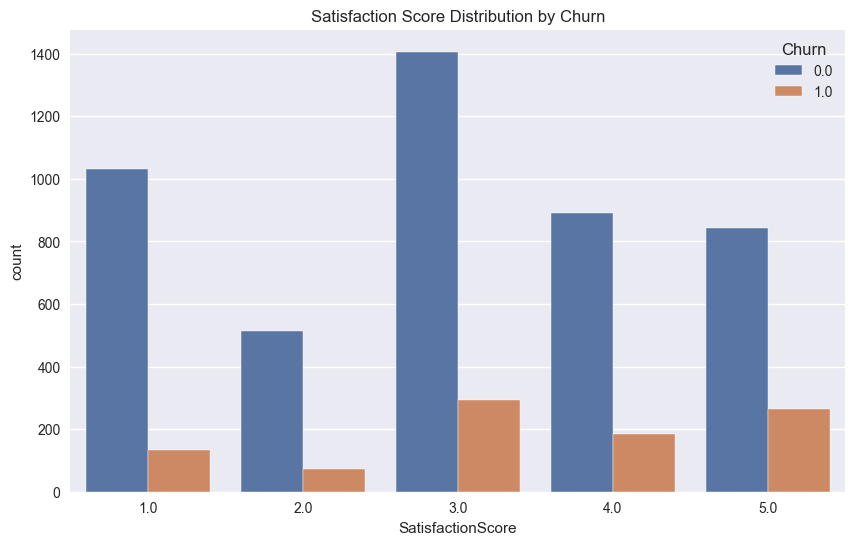

In [357]:
# Analyze satisfaction score distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='SatisfactionScore', hue='Churn', data=df)
plt.title('Satisfaction Score Distribution by Churn')
plt.show()

Factors correlated with Satisfaction Score:
SatisfactionScore     1.000000
Churn                 0.105481
NumberOfAddress       0.053583
HourSpendOnApp        0.033179
DaySinceLastOrder     0.028338
CouponUsed            0.026537
OrderCount            0.022621
OrderCount_missing    0.015245
WarehouseToHome       0.007919
CashbackAmount        0.003473
Name: SatisfactionScore, dtype: float64
Churn rate by Satisfaction Score:
   SatisfactionScore     Churn
0                1.0  0.115120
1                2.0  0.126280
2                3.0  0.171967
3                4.0  0.171322
4                5.0  0.238267


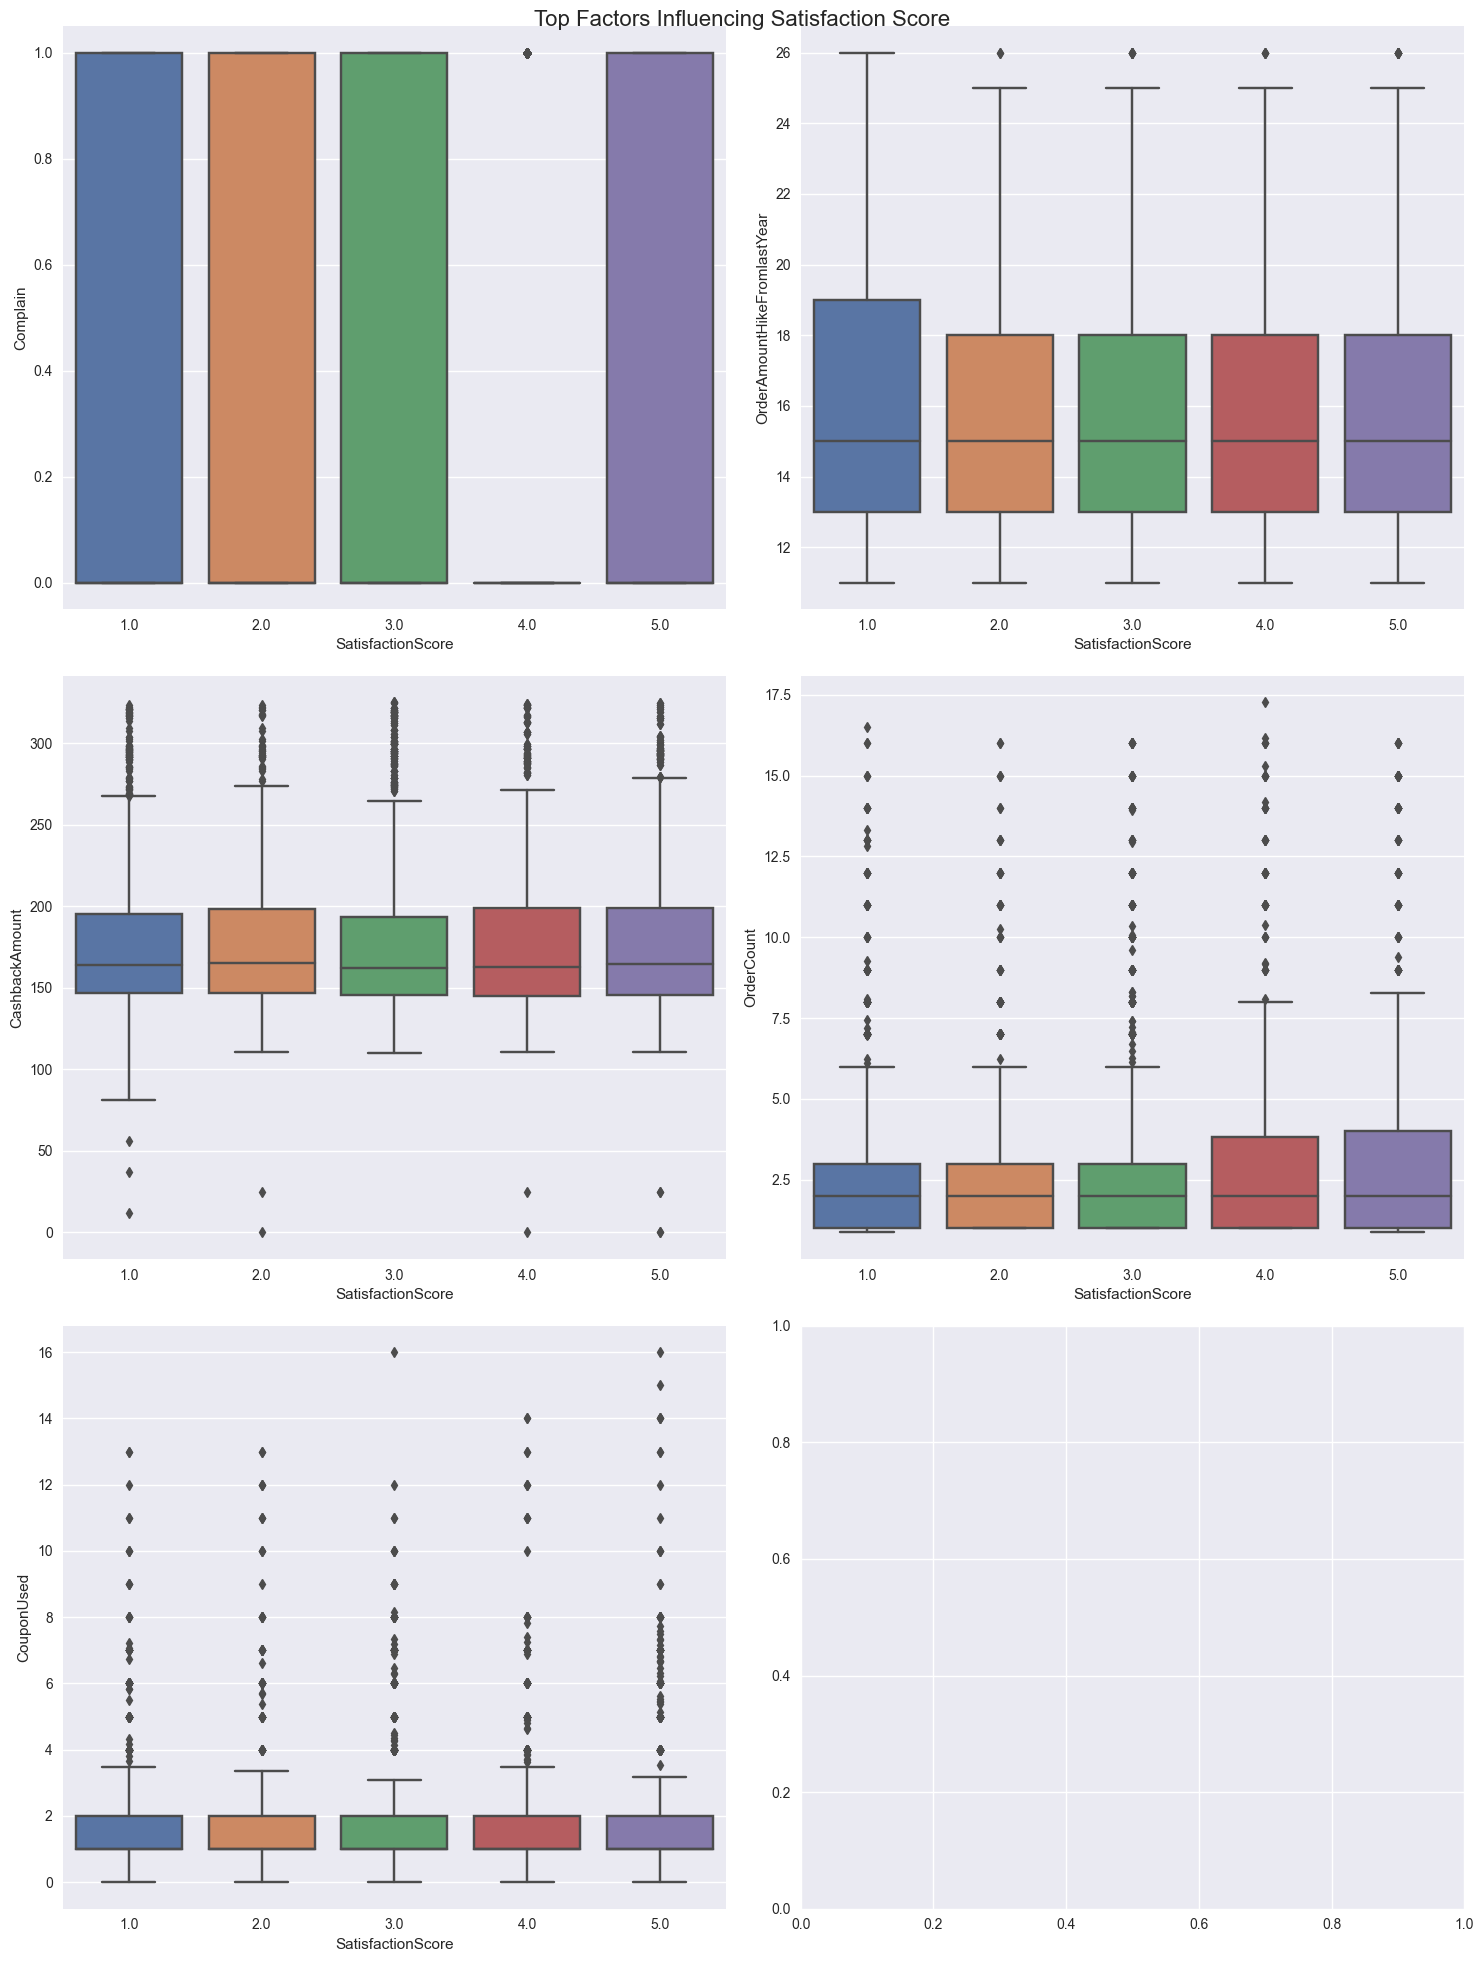

In [518]:
# Correlation between satisfaction score and other factors
satisfaction_corr = df.corr(numeric_only=True)['SatisfactionScore'].sort_values(ascending=False)
print("Factors correlated with Satisfaction Score:")
print(satisfaction_corr.head(10))

# Analyze churn rate by satisfaction score
churn_by_satisfaction = df.groupby('SatisfactionScore')['Churn'].mean(numeric_only=True).reset_index()
print("\
Churn rate by Satisfaction Score:")
print(churn_by_satisfaction)

# Analyze top factors influencing satisfaction
top_factors = ['Complain', 'OrderAmountHikeFromlastYear', 'CashbackAmount', 'OrderCount', 'CouponUsed']
fig, axes = plt.subplots(3, 2, figsize=(15, 20))
fig.suptitle('Top Factors Influencing Satisfaction Score', fontsize=16)

for i, factor in enumerate(top_factors):
    sns.boxplot(x='SatisfactionScore', y=factor, data=df, ax=axes[i//2, i%2])

plt.tight_layout()